In [78]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from datetime import datetime
from matplotlib.dates import DateFormatter
from scipy.optimize import curve_fit
import scipy.stats as stats




In [79]:
dfMod = pd.read_csv('April_data/outdoor_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfAlp = pd.read_csv('April_data/alpha_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfBet = pd.read_csv('April_data/beta_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')

In [80]:

dfMod.index = dfMod.index.map(lambda x: x.replace(second=0))
dfAlp.index = dfAlp.index.map(lambda x: x.replace(second=0))
dfBet.index = dfBet.index.map(lambda x: x.replace(second=0))

In [81]:
common_timestamps = dfMod.index.intersection(dfAlp.index).intersection(dfBet.index)

# Filter each DataFrame to keep only the rows with common timestamps
dfMod = dfMod[dfMod.index.isin(common_timestamps)]
dfAlp = dfAlp[dfAlp.index.isin(common_timestamps)]
dfBet = dfBet[dfBet.index.isin(common_timestamps)]


In [82]:
for i in range(len(dfMod)):
    if dfMod.index[i] != dfAlp.index[i] or dfMod.index[i] != dfBet.index[i]:
        print(dfMod.index[i],dfAlp.index[i],dfBet.index[i])

P-Value: 4.262410702991709e-168


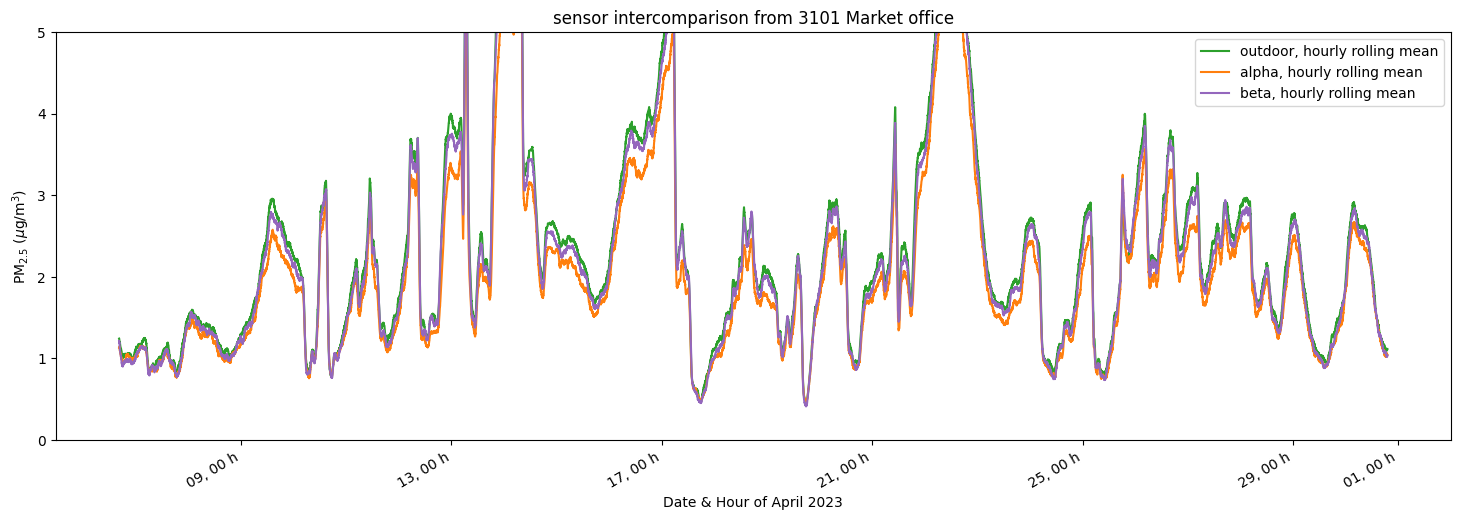

In [83]:
# Plot time series of one column
fig = plt.figure()
ax = plt.subplot(111)

parameter = 'pm1'
if parameter != 'temp' and parameter != 'rh':
    # dfMod[parameter].plot(color='tab:green', marker='o', linestyle='', markersize=1, label='outdoor, 1-min measurement', alpha=0.3)
    # dfAlp[parameter].plot(color='tab:orange', marker='o', linestyle='', markersize=1, label='alpha, 1-min measurement', alpha=0.3)
    # dfBet[parameter].plot(color='tab:purple', marker='o', linestyle='', markersize=1, label='beta, 1-min measurement', alpha=0.3)

    dfMod['60 mean']=dfMod[parameter].rolling( 60).mean()
    dfMod['60 mean'].plot(color='tab:green', label='outdoor, hourly rolling mean')
    dfAlp['60 mean']=dfAlp[parameter].rolling( 60).mean()
    dfAlp['60 mean'].plot(color='tab:orange', label='alpha, hourly rolling mean')
    dfBet['60 mean']=dfBet[parameter].rolling( 60).mean()
    dfBet['60 mean'].plot(color='tab:purple', label='beta, hourly rolling mean')

    ax.legend()

    plt.ylim((0,5))
    ax.xaxis.set_major_formatter(DateFormatter("%d, %H h"))
    plt.xlabel('Date & Hour of April 2023')
    plt.ylabel(r'$\mathrm{PM}_{2.5}\ (\mu \mathrm{g / m}^{3})$')
    plt.title('sensor intercomparison from 3101 Market office')
    plt.gcf().set_size_inches(18, 6)
    #plt.show()

    plt.savefig('initialTimeseries.pdf',dpi=300,)

    _ ,p_value = stats.ttest_ind(dfMod[parameter], dfAlp[parameter], equal_var=False)


    print("P-Value:", p_value)
else:
    print(dfMod[parameter])
    dfMod[parameter].plot(color='tab:green', marker='o', linestyle='', markersize=1, label='outdoor, 1-min measurement', alpha=0.3)
    dfAlp['sample_'+ parameter].plot(color='tab:orange', marker='o', linestyle='', markersize=1, label='alpha, 1-min measurement', alpha=0.3)
    dfBet['sample_'+ parameter].plot(color='tab:purple', marker='o', linestyle='', markersize=1, label='beta, 1-min measurement', alpha=0.3)

    dfMod['60 mean']=dfMod[parameter].rolling( 60).mean()
    dfMod['60 mean'].plot(color='tab:green', label='outdoor, hourly rolling mean')
    dfAlp['60 mean']=dfAlp['sample_'+parameter].rolling( 60).mean()
    dfAlp['60 mean'].plot(color='tab:orange', label='alpha, hourly rolling mean')
    dfBet['60 mean']=dfBet['sample_'+parameter].rolling( 60).mean()
    dfBet['60 mean'].plot(color='tab:purple', label='beta, hourly rolling mean')

    ax.legend()

 
    ax.xaxis.set_major_formatter(DateFormatter("%d, %H h"))
    plt.figsize(18,6)
    plt.xlabel('Date & Hour of April 2023')
    plt.ylabel(r'$\mathrm{PM}_{2.5}\ (\mu \mathrm{g / m}^{3})$')
    plt.title('sensor intercomparison from 3101 Market office')
  
    plt.show()

    # plt.savefig('initialTimeseries.pdf',dpi=300,)

    _ ,p_value = stats.ttest_ind(dfMod[parameter], dfAlp['sample_'+parameter], equal_var=False)







a = 0.8441622227735794 b = 0.10672741978559763
r2 = 0.9180975982187121


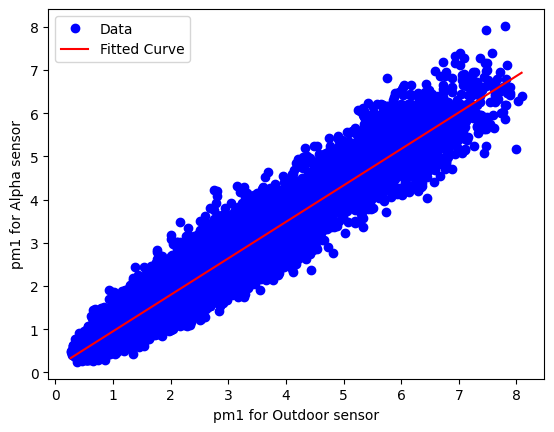

a = 0.9395910168912908 b = 0.05130434780722981
r2 = 0.9303370783643304


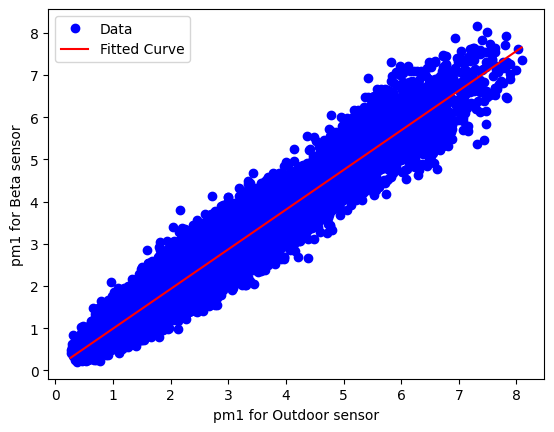

In [84]:
#plot of both the alpha(pm1) vs. Outdoor(pm1) and the beta(pm1) vs. Outdoor(pm1) sensor for fitting linear regression
fig = plt.figure()
ax = plt.subplot(111)

# linear regression equation
def linear_func(x, a, b):
    return a * x + b 

# r squared calculation
def r_squared(y, y_fit):
    
    ss_residuals = np.sum((y - y_fit)**2)
    ss_total = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_residuals / ss_total)
    return r2

# x-values for the fitted curve
x_fit = np.linspace(min(dfMod['pm1']), max(dfMod['pm1']), len(dfMod['pm1'])) 


# Fit the alpha vs. outdoor sensor data to a linear curve
alpha_popt, alpha_pcov = curve_fit(linear_func, dfMod['pm1'], dfAlp['pm1'][:len(dfMod['pm1'])])

# Generate y-values for the fitted curve using the optimized parameters
alpha_fit = linear_func(x_fit, *alpha_popt)  
# Calculate r2
alpha_r2 = r_squared(dfAlp['pm1'].values[:len(dfMod['pm1'])], linear_func(dfMod['pm1'], *alpha_popt))

# Plot the original data and the fitted curve
print("a =", alpha_popt[0], "b =", alpha_popt[1])
print("r2 =", alpha_r2)
plt.plot(dfMod['pm1'], dfAlp['pm1'][:len(dfMod['pm1'])], 'bo', label='Data')
plt.plot(x_fit, alpha_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('pm1 for Outdoor sensor')
plt.ylabel('pm1 for Alpha sensor')
plt.show()


# Make a modified alpha dataset for pm1
Mod_dfAlp = dfAlp.copy()
Mod_dfAlp['pm1'] = dfAlp['pm1'] * 1/alpha_popt[0] - alpha_popt[1]

# Fit the beta vs. outdoor sensor data to a linear curve
pm1_beta_popt, beta_pcov = curve_fit(linear_func, dfMod['pm1'], dfBet['pm1'][:len(dfMod['pm1'])])
# Generate y-values for the fitted curve using the optimized parameters
beta_fit = linear_func(x_fit, *pm1_beta_popt)  

beta_r2 = r_squared(dfBet['pm1'].values[:len(dfMod['pm1'])], linear_func(dfMod['pm1'], *pm1_beta_popt))

# Plot the original data and the fitted curve
print("a =", pm1_beta_popt[0], "b =", pm1_beta_popt[1])
print("r2 =", beta_r2)
plt.plot(dfMod['pm1'], dfBet['pm1'][:len(dfMod['pm1'])], 'bo', label='Data')
plt.plot(x_fit, beta_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('pm1 for Outdoor sensor')
plt.ylabel('pm1 for Beta sensor')
plt.show()
# Make a modified beta dataset for pm1
Mod_dfBet = dfBet.copy()
Mod_dfBet['pm1'] = dfBet['pm1'] * 1/pm1_beta_popt[0] - pm1_beta_popt[1]


a =0.8586238678356534 b =0.09522783896807835
r2 =0.9410504524774622


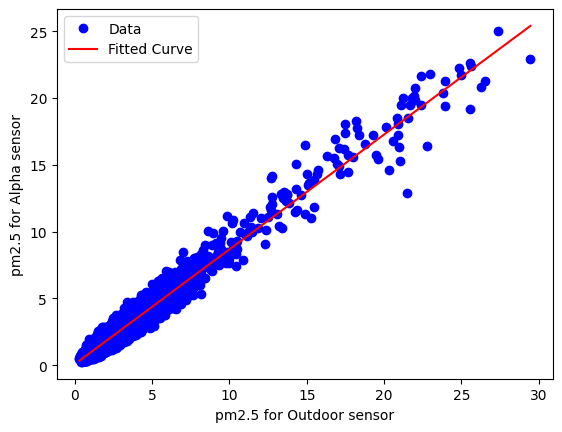

a =0.9428218586213691 b =0.05151573336292359
r2 =0.9492932998813056


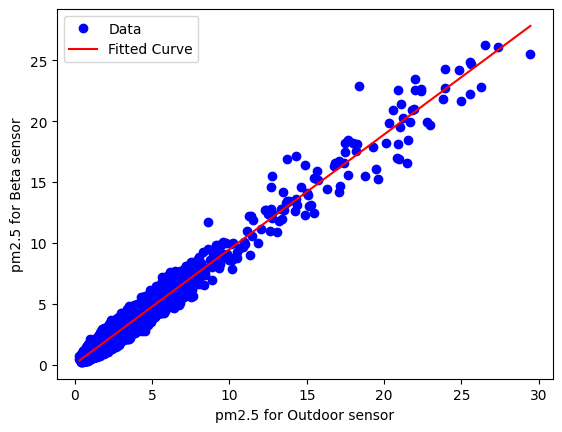

In [85]:
# plot of both the alpha(pm2.5) vs. Outdoor(pm2.5) and the beta(pm2.5) vs. Outdoor(pm2.5) sensor for fitting linear regression
fig = plt.figure()
ax = plt.subplot(111)


# x-values for the fitted curve
x_fit = np.linspace(min(dfMod['pm25']), max(dfMod['pm25']), len(dfMod['pm25'])) 
# Fit the alpha vs. outdoor sensor data to a linear curve
alpha_popt, alpha_pcov = curve_fit(linear_func, dfMod['pm25'], dfAlp['pm25'][:len(dfMod['pm25'])])


# Generate y-values for the fitted curve using the optimized parameters
alpha_fit = linear_func(x_fit, *alpha_popt) 
# Calculate r2
alpha_r2 = r_squared(dfAlp['pm25'].values[:len(dfMod['pm25'])], linear_func(dfMod['pm25'], *alpha_popt))
# Plot the original data and the fitted curve
print("a =" + str(alpha_popt[0]), "b =" + str(alpha_popt[1]))
print("r2 =" + str(alpha_r2))
plt.plot(dfMod['pm25'], dfAlp['pm25'][:len(dfMod['pm25'])], 'bo', label='Data')
plt.plot(x_fit, alpha_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('pm2.5 for Outdoor sensor')
plt.ylabel('pm2.5 for Alpha sensor')
plt.show()
# Make a modified alpha dataset for pm2.5
Mod_dfAlp = dfAlp.copy()
Mod_dfAlp['pm25'] =dfAlp['pm25']*1/alpha_popt[0] - alpha_popt[1]





# Fit the beta vs. outdoor sensor data to a linear curve
beta_popt, beta_pcov = curve_fit(linear_func, dfMod['pm25'], dfBet['pm25'][:len(dfMod['pm25'])])
# Generate y-values for the fitted curve using the optimized parameters
beta_fit = linear_func(x_fit, *beta_popt)  
#Calculate r2
beta_r2 = r_squared(dfBet['pm25'].values[:len(dfMod['pm25'])], linear_func(dfMod['pm25'], *beta_popt))
# Plot the original data and the fitted curve
print("a =" + str(beta_popt[0]), "b =" + str(beta_popt[1]))
print("r2 =" + str(beta_r2))
plt.plot(dfMod['pm25'], dfBet['pm25'][:len(dfMod['pm25'])], 'bo', label='Data')
plt.plot(x_fit, beta_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('pm2.5 for Outdoor sensor')
plt.ylabel('pm2.5 for Beta sensor')
plt.show()
# Make a modified beta dataset for pm2.5
Mod_dfBet = dfBet.copy()
Mod_dfBet['pm25'] =dfBet['pm25']*1/beta_popt[0] - beta_popt[1]

a = 1.0237864607512943 b = -0.21932119802905614
r2 = 0.9411593555527228


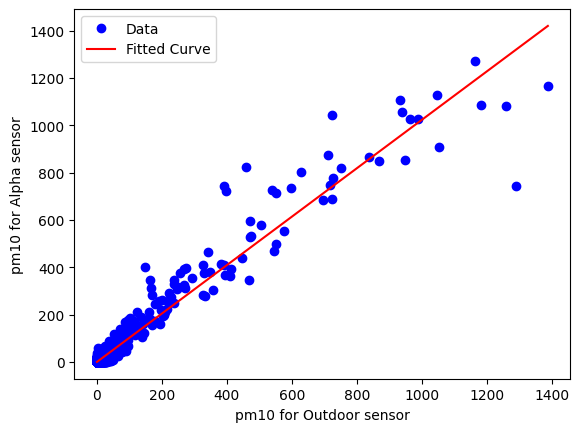

a = 0.9453230738881013 b = 0.05781056376315108
r2 = 0.9562336250373603


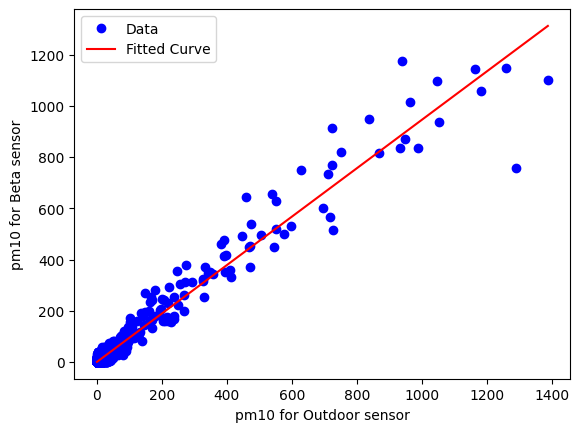

In [86]:
# plot of both the alpha(pm10) vs. Outdoor(pm10) and the beta(pm10) vs. Outdoor(pm10) sensor for fitting linear regression
fig = plt.figure()
ax = plt.subplot(111)



# x-values for the fitted curve
x_fit = np.linspace(min(dfMod['pm10']), max(dfMod['pm10']), len(dfMod['pm10'])) 

# Fit the alpha vs. outdoor sensor data to a linear curve
alpha_popt, alpha_pcov = curve_fit(linear_func, dfMod['pm10'], dfAlp['pm10'][:len(dfMod['pm10'])])
# Generate y-values for the fitted curve using the optimized parameters
alpha_fit = linear_func(x_fit, *alpha_popt)
# Calculate r2
alpha_r2 = r_squared(dfAlp['pm10'].values[:len(dfMod['pm10'])], linear_func(dfMod['pm10'], *alpha_popt))
# Plot the original data and the fitted curve
print("a =", alpha_popt[0], "b =", alpha_popt[1])
print("r2 =", alpha_r2)
plt.plot(dfMod['pm10'], dfAlp['pm10'][:len(dfMod['pm10'])], 'bo', label='Data')
plt.plot(x_fit, alpha_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('pm10 for Outdoor sensor')
plt.ylabel('pm10 for Alpha sensor')
plt.show()

# Make a modified alpha dataset for pm10
Mod_dfAlp = dfAlp.copy()
Mod_dfAlp['pm10'] = dfAlp['pm10'] * 1 / alpha_popt[0] - alpha_popt[1]
# Fit the beta vs. outdoor sensor data to a linear curve
beta_popt, beta_pcov = curve_fit(linear_func, dfMod['pm10'], dfBet['pm10'][:len(dfMod['pm10'])])
# Generate y-values for the fitted curve using the optimized parameters
beta_fit = linear_func(x_fit, *beta_popt)
# Calculate r2
beta_r2 = r_squared(dfBet['pm10'].values[:len(dfMod['pm10'])], linear_func(dfMod['pm10'], *beta_popt))
# Plot the original data and the fitted curve
print("a =", beta_popt[0], "b =", beta_popt[1])
print("r2 =", beta_r2)
plt.plot(dfMod['pm10'], dfBet['pm10'][:len(dfMod['pm10'])], 'bo', label='Data')
plt.plot(x_fit, beta_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('pm10 for Outdoor sensor')
plt.ylabel('pm10 for Beta sensor')
plt.show()
# Make a modified beta dataset for pm10
Mod_dfBet = dfBet.copy()
Mod_dfBet['pm10'] = dfBet['pm10'] * 1 / beta_popt[0] - beta_popt[1]



a =0.9981334998592396 b =-0.23036144206929968
r2 =0.9925540677960982


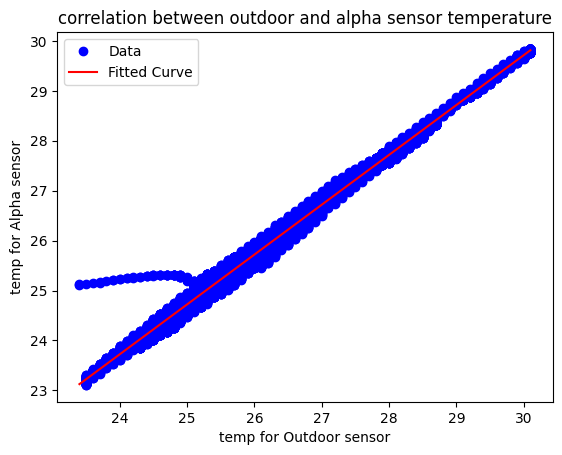

a = 1.018042990197263 b = -0.8616460122216607
r2 = 0.9961520075678811


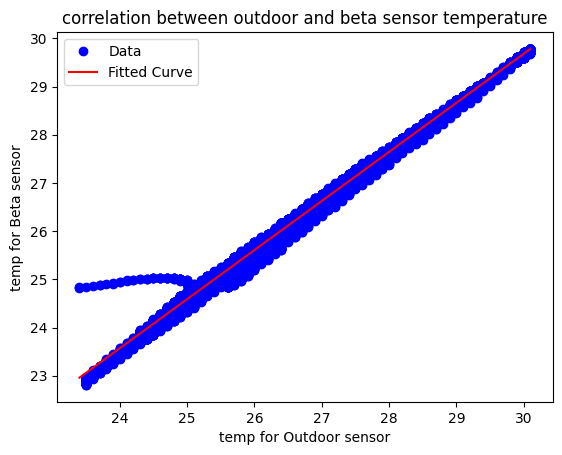

In [87]:
# finding the line of best fit as above but instead using temperature for each sensor
fig = plt.figure()
ax1 = plt.subplot(111)


temp_x_fit = np.linspace(min(dfMod['temp']), max(dfMod['temp']), len(dfMod['temp'])) 
temp_alpha_popt, temp_alpha_pcov = curve_fit(linear_func, dfMod['temp'], dfAlp['sample_temp'][:len(dfMod['temp'])])


temp_alpha_fit = linear_func(temp_x_fit, *temp_alpha_popt)  # Evaluate the curve function with optimized parameters
temp_alpha_r2 = r_squared(dfAlp['sample_temp'].values[:len(dfMod['temp'])], linear_func(dfMod['temp'], *temp_alpha_popt))

print("a =" + str(temp_alpha_popt[0]), "b =" + str(temp_alpha_popt[1]))
print("r2 =" + str(temp_alpha_r2))
plt.plot(dfMod['temp'], dfAlp['sample_temp'][:len(dfMod['temp'])], 'bo', label='Data')
plt.plot(temp_x_fit, temp_alpha_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('temp for Outdoor sensor')
plt.ylabel('temp for Alpha sensor')
plt.title('correlation between outdoor and alpha sensor temperature')
plt.show()

Mod_dfAlp['sample_temp'] =dfAlp['sample_temp']*1/temp_alpha_popt[0] - temp_alpha_popt[1]

temp_x_fit = np.linspace(min(dfMod['temp']), max(dfMod['temp']), len(dfMod['temp']))
temp_beta_popt, temp_beta_pcov = curve_fit(linear_func, dfMod['temp'], dfBet['sample_temp'][:len(dfMod['temp'])])

temp_beta_fit = linear_func(temp_x_fit, *temp_beta_popt)  # Evaluate the curve function with optimized parameters
temp_beta_r2 = r_squared(dfBet['sample_temp'].values[:len(dfMod['temp'])], linear_func(dfMod['temp'], *temp_beta_popt))

print("a =", temp_beta_popt[0], "b =", temp_beta_popt[1])
print("r2 =", temp_beta_r2)
plt.plot(dfMod['temp'], dfBet['sample_temp'][:len(dfMod['temp'])], 'bo', label='Data')
plt.plot(temp_x_fit, temp_beta_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('temp for Outdoor sensor')
plt.ylabel('temp for Beta sensor')
plt.title('correlation between outdoor and beta sensor temperature')
plt.show()


Mod_dfBet['sample_temp'] =dfBet['sample_temp']*1/temp_beta_popt[0] - temp_beta_popt[1]


a = 0.9847412581858255 b = 2.646653822956194
r2 = 0.9931027088860839


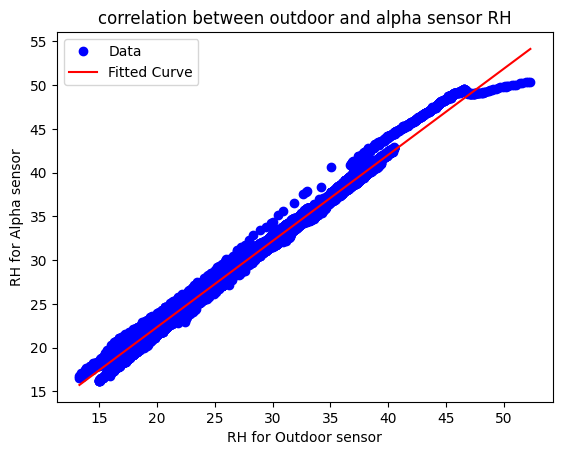

a = 0.9884225649143639 b = 2.855859688162868
r2 = 0.9908455892356427


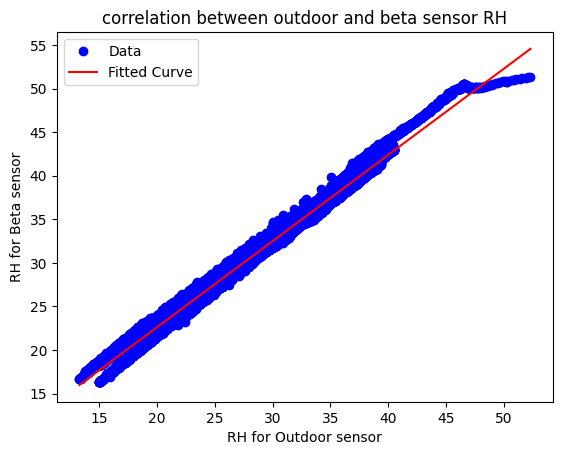

In [88]:
# doing the same as above but for humidity
fig = plt.figure()
ax1 = plt.subplot(111)

rh_x_fit = np.linspace(min(dfMod['rh']), max(dfMod['rh']), len(dfMod['rh'])) 
rh_alpha_popt, rh_alpha_pcov = curve_fit(linear_func, dfMod['rh'], dfAlp['sample_rh'][:len(dfMod['rh'])])

rh_alpha_fit = linear_func(rh_x_fit, *rh_alpha_popt)
rh_alpha_r2 = r_squared(dfAlp['sample_rh'].values[:len(dfMod['rh'])], linear_func(dfMod['rh'], *rh_alpha_popt))

print("a =", rh_alpha_popt[0], "b =", rh_alpha_popt[1])
print("r2 =", rh_alpha_r2)
plt.plot(dfMod['rh'], dfAlp['sample_rh'][:len(dfMod['rh'])], 'bo', label='Data')
plt.plot(rh_x_fit, rh_alpha_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('RH for Outdoor sensor')
plt.ylabel('RH for Alpha sensor')
plt.title('correlation between outdoor and alpha sensor RH')
plt.show()

Mod_dfAlp['sample_rh'] = dfAlp['sample_rh'] * 1 / rh_alpha_popt[0] - rh_alpha_popt[1]

rh_x_fit = np.linspace(min(dfMod['rh']), max(dfMod['rh']), len(dfMod['rh']))
rh_beta_popt, rh_beta_pcov = curve_fit(linear_func, dfMod['rh'], dfBet['sample_rh'][:len(dfMod['rh'])])

rh_beta_fit = linear_func(rh_x_fit, *rh_beta_popt)
rh_beta_r2 = r_squared(dfBet['sample_rh'].values[:len(dfMod['rh'])], linear_func(dfMod['rh'], *rh_beta_popt))

print("a =", rh_beta_popt[0], "b =", rh_beta_popt[1])
print("r2 =", rh_beta_r2)
plt.plot(dfMod['rh'], dfBet['sample_rh'][:len(dfMod['rh'])], 'bo', label='Data')
plt.plot(rh_x_fit, rh_beta_fit, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('RH for Outdoor sensor')
plt.ylabel('RH for Beta sensor')
plt.title('correlation between outdoor and beta sensor RH')
plt.show()

Mod_dfBet['sample_rh'] = dfBet['sample_rh'] * 1 / rh_beta_popt[0] - rh_beta_popt[1]


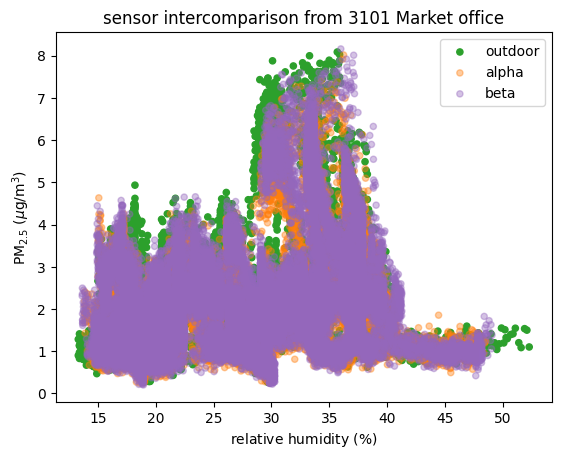

In [89]:
# plotting the modified data for humidity vs, pm2.5 for each sensor
ax1 = dfMod.plot(x="rh", y="pm1", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
Mod_dfAlp.plot(x="sample_rh", y="pm1", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
Mod_dfBet.plot(x="sample_rh", y="pm1", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot

plt.xlabel(r'$\mathrm{relative\ humidity}\ (\%)$')
plt.ylabel(r'$\mathrm{PM}_{2.5}\ (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()

P-Value Alpha: 0.9816182289966512
P-Value Beta: 0.9878881710343281


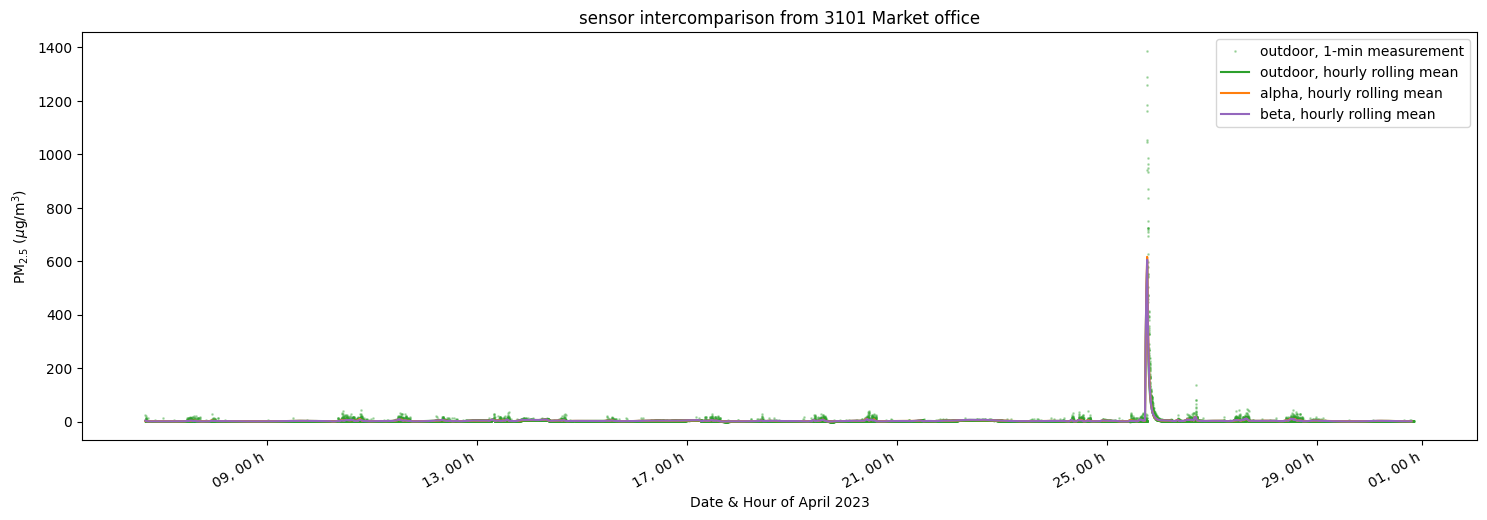

In [95]:
# Plot time series of one column
fig = plt.figure()
ax = plt.subplot(111)

parameter = 'pm10'
if parameter != 'temp' and parameter != 'rh':
    dfMod[parameter].plot(color='tab:green', marker='o', linestyle='', markersize=1, label='outdoor, 1-min measurement', alpha=0.3)
    # Mod_dfAlp[parameter].plot(color='tab:orange', marker='o', linestyle='', markersize=1, label='alpha, 1-min measurement', alpha=0.3)
    # Mod_dfBet[parameter].plot(color='tab:purple', marker='o', linestyle='', markersize=1, label='beta, 1-min measurement', alpha=0.3)

    dfMod['60 mean']=dfMod[parameter].rolling( 60).mean()
    dfMod['60 mean'].plot(color='tab:green', label='outdoor, hourly rolling mean')
    Mod_dfAlp['60 mean']=Mod_dfAlp[parameter].rolling( 60).mean()
    Mod_dfAlp['60 mean'].plot(color='tab:orange', label='alpha, hourly rolling mean')
    Mod_dfBet['60 mean']=Mod_dfBet[parameter].rolling( 60).mean()
    Mod_dfBet['60 mean'].plot(color='tab:purple', label='beta, hourly rolling mean')

    ax.legend()

    
    ax.xaxis.set_major_formatter(DateFormatter("%d, %H h"))
    plt.xlabel('Date & Hour of April 2023')
    plt.gcf().set_size_inches(18, 6)
    plt.ylabel(r'$\mathrm{PM}_{2.5}\ (\mu \mathrm{g / m}^{3})$')
    plt.title('sensor intercomparison from 3101 Market office')
    #plt.show()

    plt.savefig('initialTimeseries.pdf',dpi=300,)

    _ ,p_value_alpha = stats.ttest_ind(dfMod[parameter],Mod_dfAlp[parameter], equal_var=False)
    _ ,p_value_beta = stats.ttest_ind(dfMod[parameter],Mod_dfBet[parameter], equal_var=False)
    print("P-Value Alpha:", p_value_alpha)
    print("P-Value Beta:", p_value_beta)



    
else:
    print(dfMod[parameter])
    dfMod[parameter].plot(color='tab:green', marker='o', linestyle='', markersize=1, label='outdoor, 1-min measurement', alpha=0.3)
    # Mod_dfAlp['sample_'+ parameter].plot(color='tab:orange', marker='o', linestyle='', markersize=1, label='alpha, 1-min measurement', alpha=0.3)
    # Mod_dfBet['sample_'+ parameter].plot(color='tab:purple', marker='o', linestyle='', markersize=1, label='beta, 1-min measurement', alpha=0.3)

    dfMod['60 mean']=dfMod[parameter].rolling( 60).mean()
    dfMod['60 mean'].plot(color='tab:green', label='outdoor, hourly rolling mean')
    Mod_dfAlp['60 mean']=Mod_dfAlp['sample_'+parameter].rolling( 60).mean()
    Mod_dfAlp['60 mean'].plot(color='tab:orange', label='alpha, hourly rolling mean')
    Mod_dfBet['60 mean']=Mod_dfBet['sample_'+parameter].rolling( 60).mean()
    Mod_dfBet['60 mean'].plot(color='tab:purple', label='beta, hourly rolling mean')
    
    ax.legend()


    ax.xaxis.set_major_formatter(DateFormatter("%d, %H h"))
    plt.xlabel('Date & Hour of April 2023')
    plt.ylabel(r'$\mathrm{PM}_{2.5}\ (\mu \mathrm{g / m}^{3})$')
    plt.title('sensor intercomparison from 3101 Market office')
    plt.show()

    # plt.savefig('initialTimeseries.pdf',dpi=300,)

    _ ,p_value_alpha = stats.ttest_ind(dfMod[parameter], Mod_dfAlp['sample_'+parameter], equal_var=False)
    print("P-Value Alpha:", p_value_alpha)
    _, p_value_beta = stats.ttest_ind(dfMod[parameter], Mod_dfBet['sample_'+parameter], equal_var=False)
    print("P-Value Beta:", p_value_beta)
    


P-Value: 0.12839557111939737
1.1160012087859719
0.04748418575223234


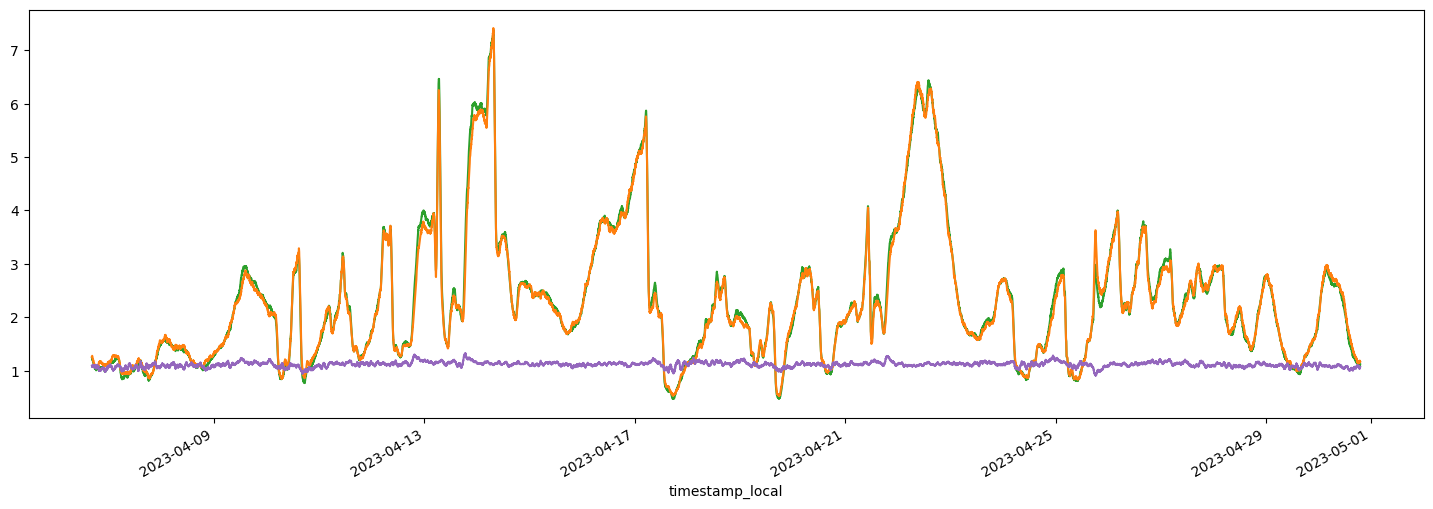

In [91]:
# def min_max_scaling(series, new_min, new_max):
#     data_min = series.min()
#     data_max = series.max()
#     scaled_series = (series - data_min) / (data_max - data_min) * (new_max - new_min) + new_min
#     return scaled_series

# new_min = dfMod['pm1'].min()
# new_max = dfMod['pm1'].max()
# Mod_dfAlp['pm1'] = min_max_scaling(Mod_dfAlp['pm1'], new_min, new_max)

# Plot time series of one column
fig = plt.figure()
ax = plt.subplot(111)
plt.gcf().set_size_inches(18, 6)

# dfMod['pm1'].plot(color='tab:green', marker='o', linestyle='', markersize=1, label='outdoor, 1-min measurement', alpha=0.3)
# scaled_data_min_max.plot(color='tab:orange', marker='o', linestyle='', markersize=1, label='alpha, 1-min measurement', alpha=0.3)



dfMod['60 mean']=dfMod['pm1'].rolling( 60).mean()
Mod_dfAlp['60 mean'] = Mod_dfAlp['pm1'].rolling( 60).mean()
ratio = dfMod['60 mean'] / Mod_dfAlp['60 mean']
Mod_dfAlp['60 mean'] = Mod_dfAlp['60 mean'] * ratio.mean()

Mod_dfAlp['pm1'] = Mod_dfAlp['pm1'] * ratio.mean()


dfMod['60 mean'].plot(color='tab:green', label='outdoor, hourly rolling mean')

Mod_dfAlp['60 mean'].plot(color='tab:orange', label='alpha, hourly rolling mean')

_, p_value = stats.ttest_ind(dfMod['pm1'], Mod_dfAlp['pm1'], equal_var=False)
print("P-Value:", p_value)





ratio.plot(color='tab:purple', label='ratio of outdoor to alpha')
print(ratio.mean())
print(ratio.std())





P-Value: 0.1817956434299511
1.1073080724370794
0.04555704307643492


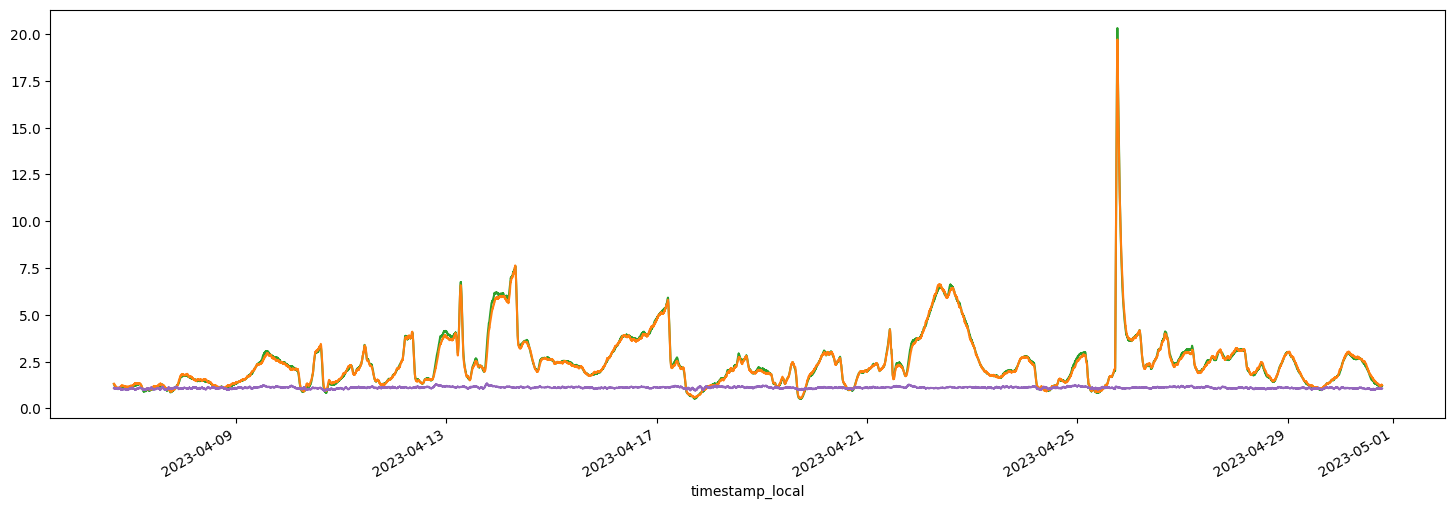

In [94]:


dfMod['60 mean'] = dfMod['pm25'].rolling( 60).mean()   
Mod_dfAlp['60 mean'] = dfAlp['pm25'].rolling( 60).mean()

ratio = dfMod['60 mean'] / Mod_dfAlp['60 mean']
Mod_dfAlp['60 mean'] = Mod_dfAlp['60 mean'] * ratio.mean()

Mod_dfAlp['pm25'] = dfAlp['pm25'] * ratio.mean()


dfMod['60 mean'].plot(color='tab:green', label='outdoor, hourly rolling mean')

Mod_dfAlp['60 mean'].plot(color='tab:orange', label='alpha, hourly rolling mean')

_, p_value = stats.ttest_ind(dfMod['pm25'], Mod_dfAlp['pm25'], equal_var=False)
print("P-Value:", p_value)

ratio.plot(color='tab:purple', label='ratio of outdoor to alpha')
print(ratio.mean())
print(ratio.std())
